# reference links

[UNET starter tutorial kaggle](https://www.kaggle.com/keegil/keras-u-net-starter-lb-0-277)

[Output shape of conv2d_transpose](https://stackoverflow.com/questions/48970538/what-defines-the-output-tensor-shape-of-tf-layers-conv2d-transpose)

[Tensorflow examples github](https://github.com/aymericdamien/TensorFlow-Examples)

[Tensorflow basics](https://medium.com/the-artificial-impostor/notes-understanding-tensorflow-part-1-5f0ebb253ad4)

[Building CNN medium](https://medium.com/data-science-group-iitr/building-a-convolutional-neural-network-in-python-with-tensorflow-d251c3ca8117)

[Convolution experiments](https://mourafiq.com/2016/08/10/playing-with-convolutions-in-tensorflow.html)

[Tensorflow tutorial mlmastery](https://adventuresinmachinelearning.com/python-tensorflow-tutorial/)

# check if GPU available

[Tensorflow GPU support](https://www.tensorflow.org/install/gpu)

In [5]:
import tensorflow as tf

with tf.Session() as sess:
    devices = sess.list_devices()
    for i in devices:
        print(i)

_DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 268435456, 4215003323078958494)
_DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 2530517342571469847)
_DeviceAttributes(/job:localhost/replica:0/task:0/device:GPU:0, GPU, 1673920512, 6957721728091392051)
_DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_GPU:0, XLA_GPU, 17179869184, 3938543929602901756)


In [6]:
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [7]:
tf.test.is_built_with_cuda()

True

In [8]:
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

In [9]:
# now use above sess to run

# Libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import joblib
from glob import glob
import skimage as io


# custom modules
from loadData import LoadBin
from visualize.plots import Plots
%matplotlib qt

In [11]:
ldBin_ob = LoadBin()
plt_ob = Plots()

# Required Binaries

In [12]:
# dictionaries
c = joblib.load("./picklefiles/DICT")
rc = joblib.load("./picklefiles/REVERSE_DICT")

# dataframes
img_path_df = joblib.load("./picklefiles/img_path_df")
train_master_df = joblib.load("./picklefiles/train_master_df")
val_master_df = joblib.load("./picklefiles/val_master_df")

# Summary

# Parameters for loading 

In [13]:
rc[4]

'motorcycle'

In [14]:
cat_id = 4
type_data = "train"


train_df = ldBin_ob.fetch_df_bin(cat_id,type_data)
train_df.head(10)

id                                     path
0  386838  ../data/coco/train2017/000000386838.jpg
1  536179  ../data/coco/train2017/000000536179.jpg
2  517176  ../data/coco/train2017/000000517176.jpg
3  444703  ../data/coco/train2017/000000444703.jpg
4     690  ../data/coco/train2017/000000000690.jpg
5  185314  ../data/coco/train2017/000000185314.jpg
6  360388  ../data/coco/train2017/000000360388.jpg
7  196777  ../data/coco/train2017/000000196777.jpg
8  498400  ../data/coco/train2017/000000498400.jpg
9    9286  ../data/coco/train2017/000000009286.jpg

In [15]:
img_id, img_path = train_df.iloc[7]
img_id,img_path

(196777, '../data/coco/train2017/000000196777.jpg')

In [16]:
a = plt.imread(img_path)
a.shape

(480, 640, 3)

(480, 640, 3)


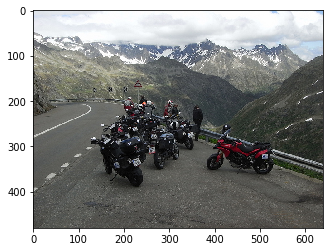

In [17]:
ip = plt.imread(img_path)
ip = io.img_as_float32(ip)
print(ip.shape)
plt.imshow(ip)

In [18]:
def conv_layer(input, filter_size,  num_input_channels, num_filters, strides=[1, 1, 1, 1], name="CONV_DEFAULT"):

    with tf.variable_scope(name) as scope:
        # Shape of the filter-weights for the convolution
        shape = [filter_size, filter_size, num_input_channels, num_filters]
        print(name, " [f x f x ip_channels, num_filters]", end="=")
        print(shape)

        # Create new weights (filters) with the given shape
        weights = tf.Variable(tf.truncated_normal(shape, stddev=0.05))

        # Create new biases, one for each filter
        biases = tf.Variable(tf.constant(0.05, shape=[num_filters]))

        # TensorFlow operation for convolution
        layer = tf.nn.conv2d(input=input, filter=weights,
                             strides=strides, padding='SAME', name=name)

        # Add the biases to the results of the convolution.
        layer += biases

        print(name, "op:", layer.shape, "\n")

        return layer, weights

In [19]:
def pool_layer(input, ksize=[1,2,2,1],name="DEFAULT_POOL"):
    
    with tf.variable_scope(name) as scope:
        # TensorFlow operation for convolution
        layer = tf.nn.max_pool2d(input=input, ksize=ksize, strides=[1,1,1,1], padding='SAME')
        
        print(name,"ksize",ksize)
        print(name," op:",layer.shape,"\n")
        return layer

In [20]:
ip_ = ip.reshape(1,ip.shape[0],ip.shape[1],ip.shape[2])

In [21]:
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

# Small pipeline

In [22]:
# compression
c1 = conv_layer(ip_,filter_size=2,num_input_channels=3,num_filters=64,strides=[1,1,1,1],name="CONV_1")
p1 = pool_layer(c1[0],[1,2,2,1],"POOL_1")
c2 = conv_layer(p1,filter_size=2,num_input_channels=4,num_filters=128,strides=[1,2,2,1],name="CONV_2")
p2 = pool_layer(c2[0],[1,1,1,1],"POOL_2")
c3 = conv_layer(p2,filter_size=4,num_input_channels=2,num_filters=256,strides=[1,1,1,1],name="CONV_3")
p3 = pool_layer(c3[0],[1,2,2,1],"POOL_3")
c4 = conv_layer(p3,filter_size=4,num_input_channels=2,num_filters=128,strides=[1,2,2,1],name="CONV_4")
p4 = pool_layer(c4[0],[1,2,2,1],"POOL_4")

CONV_1  [f x f x ip_channels, num_filters]=[2, 2, 3, 64]
CONV_1 op: (1, 480, 640, 64) 

POOL_1 ksize [1, 2, 2, 1]
POOL_1  op: (1, 480, 640, 64) 

CONV_2  [f x f x ip_channels, num_filters]=[2, 2, 4, 128]
CONV_2 op: (1, 240, 320, 128) 

POOL_2 ksize [1, 1, 1, 1]
POOL_2  op: (1, 240, 320, 128) 

CONV_3  [f x f x ip_channels, num_filters]=[4, 4, 2, 256]
CONV_3 op: (1, 240, 320, 256) 

POOL_3 ksize [1, 2, 2, 1]
POOL_3  op: (1, 240, 320, 256) 

CONV_4  [f x f x ip_channels, num_filters]=[4, 4, 2, 128]
CONV_4 op: (1, 120, 160, 128) 

POOL_4 ksize [1, 2, 2, 1]
POOL_4  op: (1, 120, 160, 128) 



In [23]:
init = tf.global_variables_initializer()
writer = tf.summary.FileWriter(logdir="./.tflogs/", graph = sess.graph)

sess.run(init)
t = sess.run(p4)

In [24]:
t.shape

(1, 120, 160, 128)

# add conv2d_transpose pipeline

In [26]:
def convT_layer(input, filter_size,  num_input_channels, num_filters,
                strides, output_shape, name="TCONV_DEFAULT"):

    # conv_op,f,output_shape=ip.shape,strides=[1,2,2,1],padding="SAME"
    with tf.variable_scope(name) as scope:
        # Shape of the filter-weights for the transposed convolution
        shape = [filter_size, filter_size, num_input_channels, num_filters]
        print(name, " [f x f x ip_channels, num_filters]", end="=")
        print(shape)

        # Create new weights (filters) with the given shape
        weights = tf.Variable(tf.truncated_normal(shape, stddev=0.05))

        # Create new biases, one for each filter
        biases = tf.Variable(tf.constant(0.05, shape=[num_filters]))

        # TensorFlow operation for transposed convolution
        layer = tf.nn.conv2d_transpose(input=input, filter=weights,
                                       strides=strides, output_shape=output_shape, padding='SAME', name=name)

        # Add the biases to the results of the transposed convolution.
        layer += biases

        print(name, "op:", layer.shape, "\n")

        return layer, weights

In [42]:
cT4 = convT_layer(p4, filter_size=4, num_input_channels=2, num_filters=128,
            strides=[1,1,1,1], output_shape=[1, 120, 160, 128])
# notice 
# output shape = output shape of c4 (1, 120, 160, 128)
# strides = strides used to get c4
# filter = filter used to get c4
# in similar manner create filter
# i.e [f x f x ip_channels, num_filters] = [filter_size, filter_size, num_input_channels, num_filters]

TCONV_DEFAULT  [f x f x ip_channels, num_filters]=[4, 4, 2, 128]
TCONV_DEFAULT op: (1, 120, 160, 128) 



In [43]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(cT4)

In [45]:
cT4[0].shape

TensorShape([Dimension(1), Dimension(120), Dimension(160), Dimension(128)])